In [157]:
import networkx as nx
from matplotlib.pyplot import figure
from collections import Counter
import matplotlib.pyplot as plt
from SEIRNetwork import SEIRNetwork
import numpy as np
from math import log
from statistics import mean

In [ ]:
SEIR_network = SEIRNetwork()

In [95]:
house_dict = {}
for house in SEIR_network.households:
    for indice in house["indices"]:
        house_dict[indice] = house['size']

In [96]:
degree_sequence = []
for i,age_group in enumerate(SEIR_network.individualAgeBracketLabels):
    degree = -1
    if age_group == '0-4':
        while not 0<=degree<=17.7:
            degree = np.random.poisson(lam = 8.6)

    elif age_group in ['5-9','10-14','15-19']:
        while not 12.5<=degree<=19.8:
            degree = np.random.poisson(lam = 16.2)

    elif age_group in ['20-24','25-29','30-34','35-39']:
        while not 12.6<=degree<=17.9:
            degree = np.random.poisson(lam = 15.3)

    elif age_group in ['40-44','45-49','50-54','55-59']:
        while not 11<=degree<=16.6:
            degree = np.random.poisson(lam = 13.8)

    elif age_group in ['60-64','65-69','70-74','75-79','80-84','85-89','90']:
        while not 7.3<=degree<=20.5:
            degree = np.random.poisson(lam = 13.9)
    
    if degree == -1:
        raise BaseException(age_group)
    degree_sequence.append(max(0,(degree-house_dict[i]-1)))
if sum(degree_sequence)%2==1:
    degree_sequence[-1] += 1
        

In [102]:
G = nx.random_degree_sequence_graph(degree_sequence)

Text(0.5, 0, 'Degree')

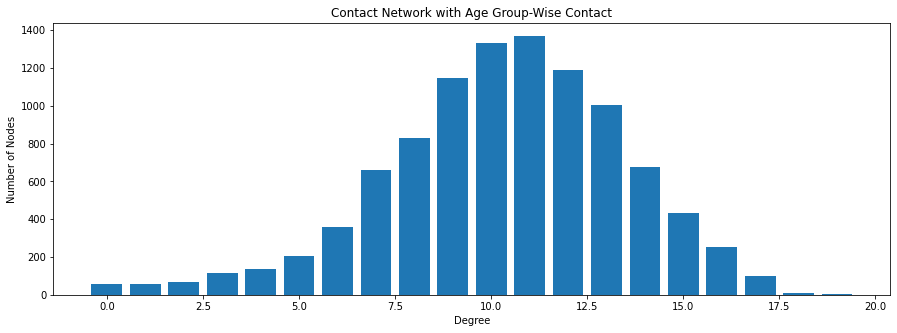

In [98]:
figure(figsize=(15,5))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=0.80)

plt.title("Contact Network with Age Group-Wise Contact")
plt.ylabel("Number of Nodes")
plt.xlabel("Degree")

In [99]:
G_household_edges = SEIR_network.get_network("household").edges

In [100]:
G.add_edges_from(G_household_edges)


Text(0.5, 0, 'Degree')

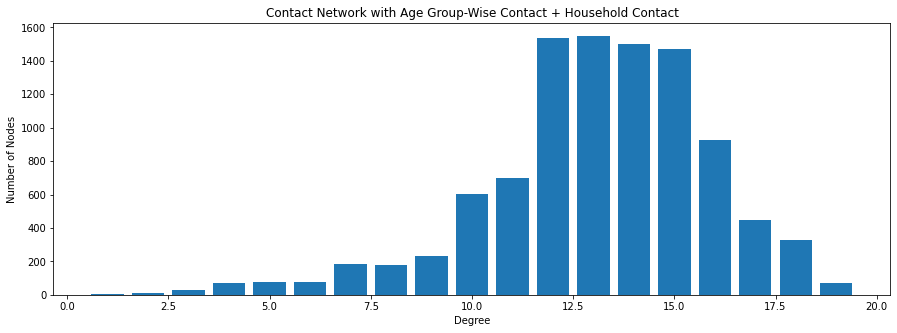

In [101]:
figure(figsize=(15,5))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=0.80)

plt.title("Contact Network with Age Group-Wise Contact + Household Contact")
plt.ylabel("Number of Nodes")
plt.xlabel("Degree")

In [113]:
age_edge = {}
for u,v in G.edges:
    age_grp_1 = SEIR_network.individualAgeBracketLabels[u]
    age_grp_2 = SEIR_network.individualAgeBracketLabels[v]
    if age_grp_1 > age_grp_2:
        age_grp_1,age_grp_2 = age_grp_2,age_grp_1
    key = f'{age_grp_1} -> {age_grp_2}'
    age_edge[key] = age_edge.get(key,0) + 1

In [116]:
age_edge = {}
for u,v in G.edges:
    age_grp_1 = SEIR_network.individualAgeBracketLabels[u]
    age_grp_2 = SEIR_network.individualAgeBracketLabels[v]
    
    if age_grp_1 not in age_edge:
        age_edge[age_grp_1] = {}
    age_edge[age_grp_1][age_grp_2] = age_edge[age_grp_1].get(age_grp_2,0) + 1
    
    if age_grp_1 == age_grp_2:
        continue

    if age_grp_2 not in age_edge:
        age_edge[age_grp_2] = {}
    age_edge[age_grp_2][age_grp_1] = age_edge[age_grp_2].get(age_grp_1,0) + 1

<BarContainer object of 19 artists>

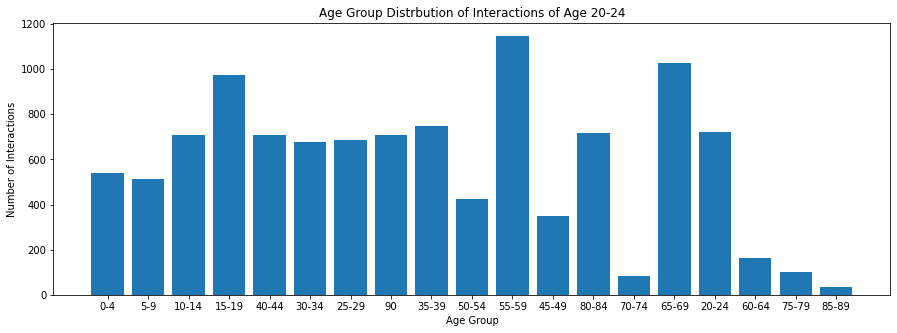

In [126]:
figure(figsize=(15,5))
plt.title("Age Group Distrbution of Interactions of Age 20-24")
plt.ylabel("Number of Interactions")
plt.xlabel("Age Group")
plt.bar(age_edge['20-24'].keys(),age_edge['0-4'].values())

In [141]:
from collections import defaultdict


age_degree_sequence_map = defaultdict(list)
age_node_id_map = defaultdict(list)
for i,age_group in enumerate(SEIR_network.individualAgeBracketLabels):
    degree = -1
    if age_group == '0-4':
        while not 0<=degree<=17.7:
            degree = np.random.poisson(lam = 8.6)

    elif age_group in ['5-9','10-14','15-19']:
        while not 12.5<=degree<=19.8:
            degree = np.random.poisson(lam = 16.2)

    elif age_group in ['20-24','25-29','30-34','35-39']:
        while not 12.6<=degree<=17.9:
            degree = np.random.poisson(lam = 15.3)

    elif age_group in ['40-44','45-49','50-54','55-59']:
        while not 11<=degree<=16.6:
            degree = np.random.poisson(lam = 13.8)

    elif age_group in ['60-64','65-69','70-74','75-79','80-84','85-89','90']:
        while not 7.3<=degree<=20.5:
            degree = np.random.poisson(lam = 13.9)
    
    if degree == -1:
        raise BaseException(age_group)

    group = ""
    if age_group in ['0-4','5-9']:
        group = "0_9"
    elif age_group in ['10-14','15-19']:
        group = "10_19"
    elif age_group in ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64']:
        group = "20_64"
    elif age_group in ['65-69','70-74','75-79','80-84','85-89','90']:
        group = "65_over"
    
    if group == "":
        raise BaseException(age_group)
    age_degree_sequence_map[group].append(max(0,(degree-house_dict[i]-1)))
    age_node_id_map[group].append(i)



In [142]:
network_map = {}
for age_group in age_degree_sequence_map:
    degree_sequence = age_degree_sequence_map[age_group]
    if sum(degree_sequence)%2==1:
        degree_sequence[-1] += 1

    node_id_list = age_node_id_map[age_group]

    network_map[age_group] = nx.random_degree_sequence_graph(degree_sequence)
    
    node_node_id_map = {i:node_id_list[i] for i in network_map[age_group].nodes}
    
    network_map[age_group] = nx.relabel_nodes(network_map[age_group],node_node_id_map)
    

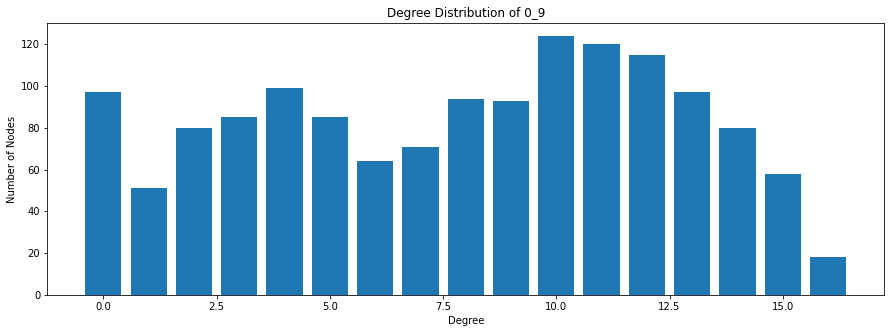

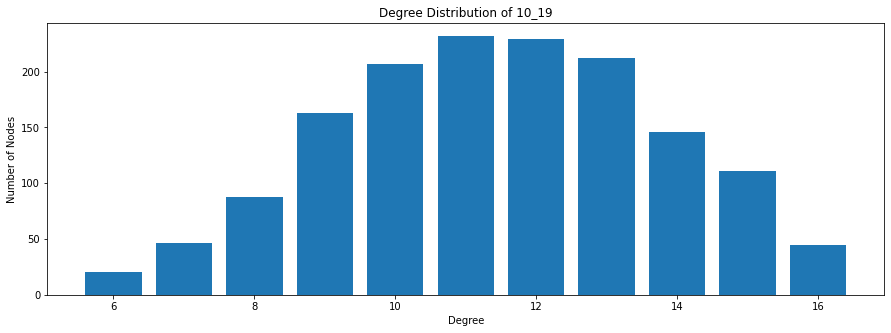

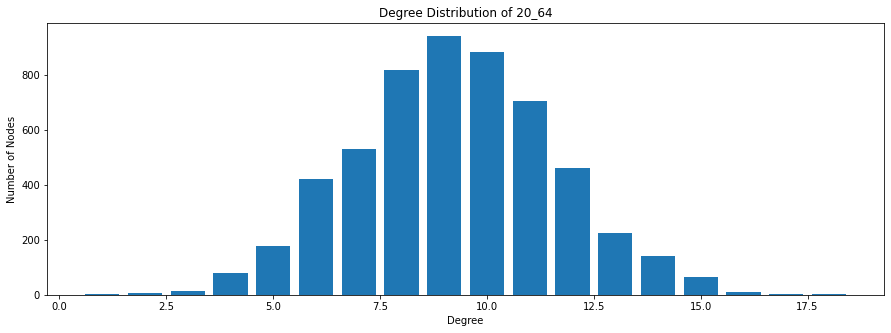

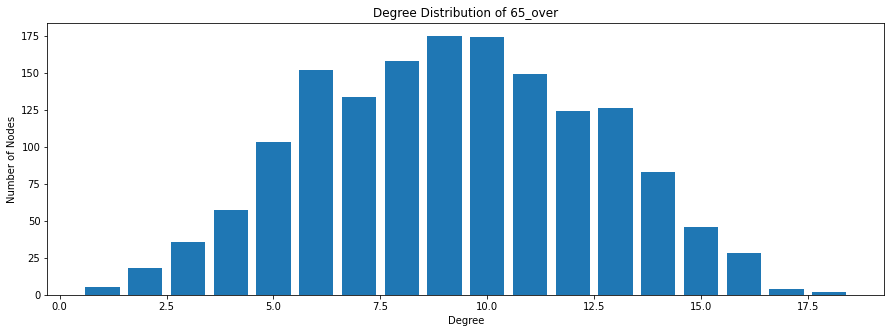

In [143]:
for age_group in network_map:
    G = network_map[age_group]
    figure(figsize=(15,5))
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.bar(deg, cnt, width=0.80)

    plt.title(f"Degree Distribution of {age_group}")
    plt.ylabel("Number of Nodes")
    plt.xlabel("Degree")

In [145]:
G = nx.Graph()
for age_group in network_map:
    SubG = network_map[age_group]
    G.add_edges_from(SubG.edges())
    G.add_nodes_from(SubG.nodes())

Text(0.5, 0, 'Degree')

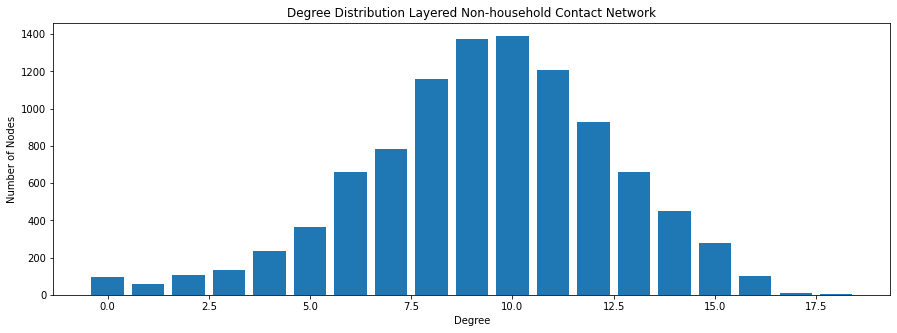

In [149]:
figure(figsize=(15,5))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=0.80)

plt.title(f"Degree Distribution Layered Non-household Contact Network")
plt.ylabel("Number of Nodes")
plt.xlabel("Degree")

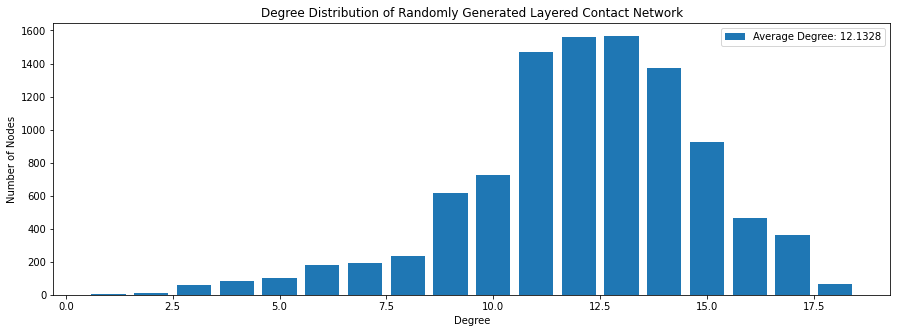

In [153]:
from statistics import mean
import matplotlib.patches as mpatches

G_household_edges = SEIR_network.get_network("household").edges

G.add_edges_from(G_household_edges)

figure(figsize=(15,5))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=0.80)

plt.title(f"Degree Distribution of Randomly Generated Layered Contact Network")
plt.ylabel("Number of Nodes")
plt.xlabel("Degree")

mean_degree_patch = mpatches.Patch(label=f'Average Degree: {mean(degree_sequence)}')
plt.legend(handles=[mean_degree_patch])

In [156]:
min(degree_sequence),max(degree_sequence)

(1, 18)

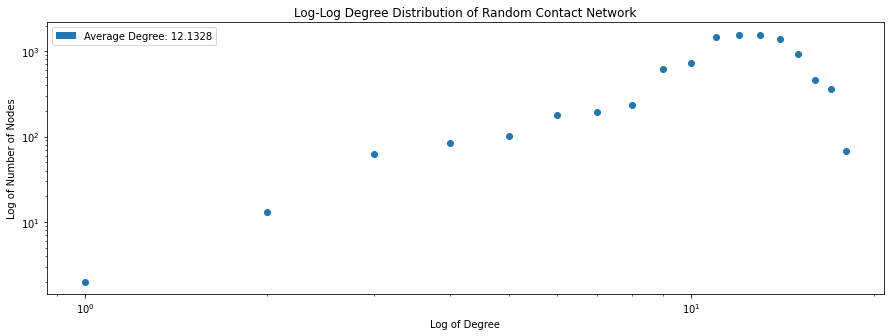

In [161]:
figure(figsize=(15,5))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.scatter(deg, cnt)
plt.yscale('log')
plt.xscale('log')
plt.title(f"Log-Log Degree Distribution of Random Contact Network")
plt.ylabel("Log of Number of Nodes")
plt.xlabel("Log of Degree")

mean_degree_patch = mpatches.Patch(label=f'Average Degree: {mean(degree_sequence)}')
plt.legend(handles=[mean_degree_patch])